Using tf.keras on FashionMNIST classification task.

# Import TF and Keras

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Import Fashion MNIST Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 9s 2us/step


Fashion MNIST is a simple image classification dataset, which is useful for learning and understanding ML concepts.

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_images)

10000

## Pretreatment
The pixel values in dataset is in range [0, 255]. We should first convert them to range [0, 1].

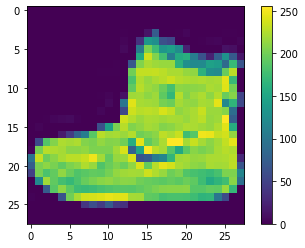

In [9]:
%matplotlib inline
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Simply, we can convert the data to float, and then divide the data with 255.0.
The training and testing dataset should be treated the same way.

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Showing the first 25 converted images.

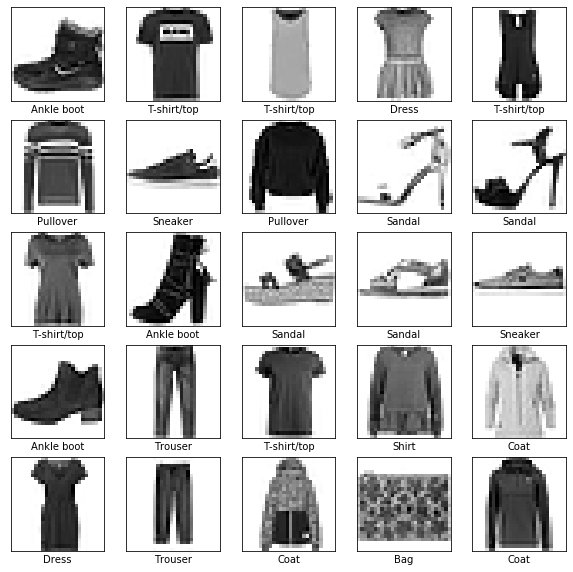

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Building models in keras
The basic components in a ml model is layers. Here we build a sequential NN with two hidden FC layer.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0920 10:13:02.458345 21644 deprecation.py:506] From C:\Users\HP\.conda\envs\tfgpu\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


The first layer, keras.layers.Flatten, is used to flatten the 2-D input data with shape (28, 28) into a 1-D tensor with shape(28 * 28), with no trainable weights.
The second layer, keras.layers.Dense, is a dense FC layer with 128 nodes and activation as relu. The third and final layer is another dense FC layer with output with 10 nodes and activation as softmax.

## Compile the model
Before training, the model need more components, such as:
* loss function
* optimizer
* evaluation

We can compile them into the model.

In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
In training, we should do following steps:
* provide the model with the data for training
* help the model to learn the relations between data and labels
* ask the model to predict labels with the test data
In keras, model.fit is used for training.

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4992 - acc: 0.8248
Epoch 2/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3778 - acc: 0.8624
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3369 - acc: 0.8757
Epoch 4/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3132 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2959 - acc: 0.8910


## Evaluating the model
Using model.evaluate to evaluating the metrics of trained model.

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3526 - acc: 0.8728
Test accuracy: 0.8728


## Predict with the model
Using model.predict to predict the classification for given images.

In [17]:
predictions = model.predict(test_images)
predictions[0]

array([3.0778177e-05, 1.0166591e-06, 7.1368763e-06, 3.4241197e-07,
       1.1219406e-05, 5.2986341e-03, 1.2000870e-05, 1.3401135e-02,
       7.8322613e-05, 9.8115933e-01], dtype=float32)

Here shows the prediction tensor with 10 softmax confidence. The max confidence indicates the most likely class for the given image.

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

We can use pyplot to show the details.

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

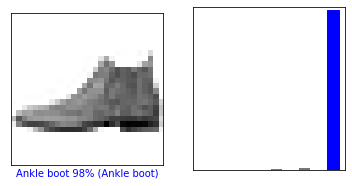

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

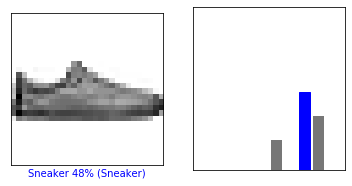

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

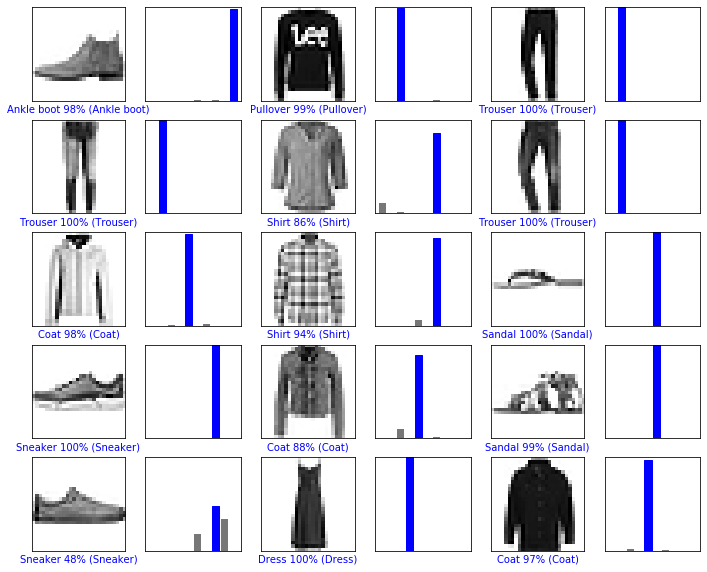

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)